In [14]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Iris.csv") 
df.head()  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

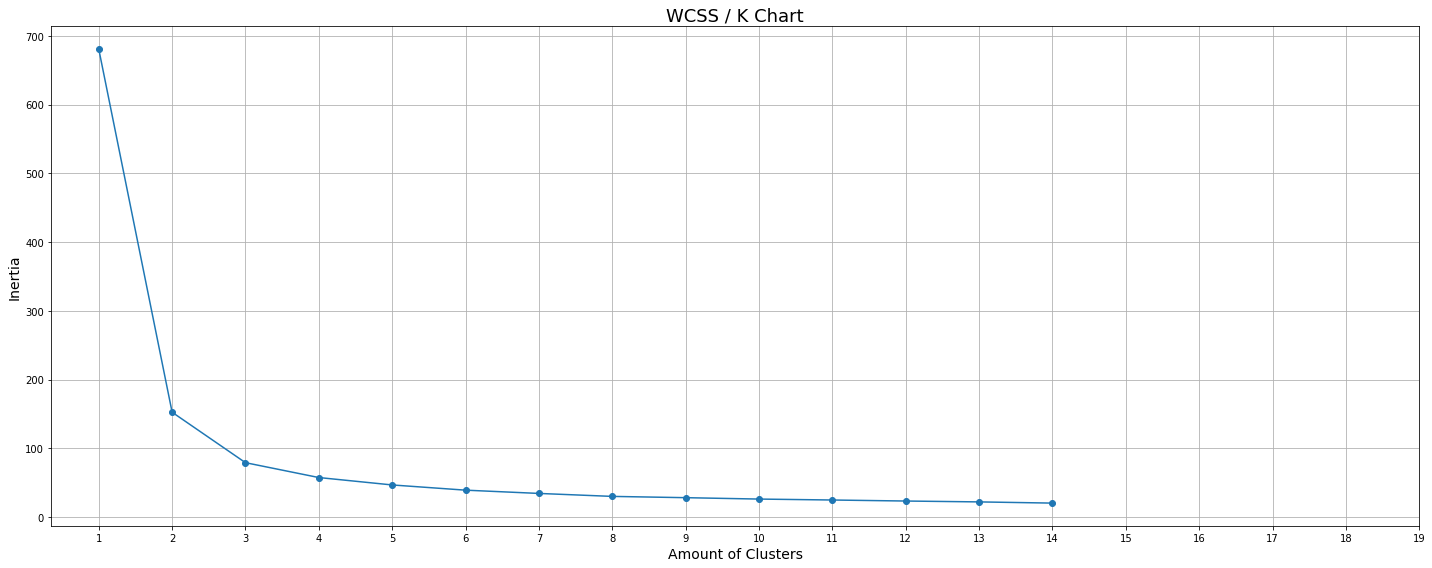

In [10]:
kmeans = KMeans(n_clusters=99) 
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [12]:
# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])

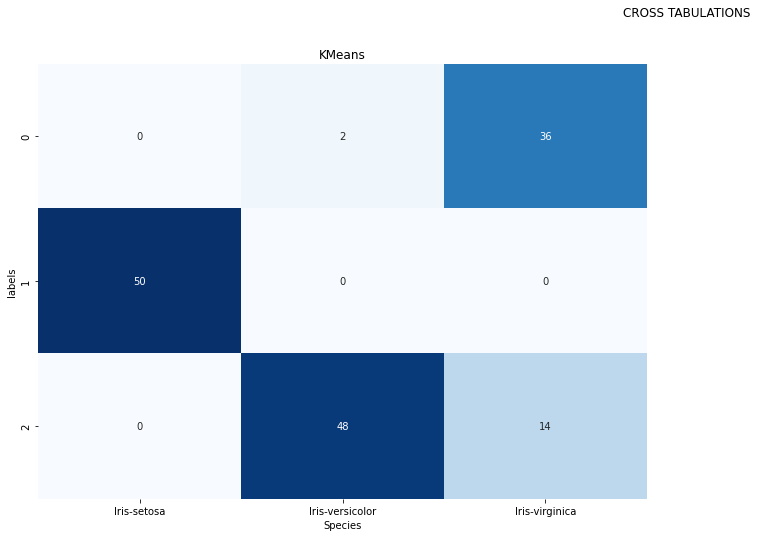

In [16]:
plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS")
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")